In [212]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

def sample_mean(samples):
    return np.mean(samples)

def sample_var(samples):
    m = np.mean(samples)**2
    samples = samples**2
    return (np.mean(samples) - m)*len(samples)/(len(samples)-1)

url_flights  =  "https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv"
url_weather  =  "https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv"

flights = pd.read_csv(url_flights, sep=',') 
weather = pd.read_csv(url_weather, sep=',')

airports = np.array(['EWR', 'JFK', 'LGA'])
flightsport = [flights[flights['origin'] == 'EWR'], flights[flights['origin'] == 'JFK'], flights[flights['origin'] == 'LGA']]

# Delay analysis

## i. Dependency on season of departure

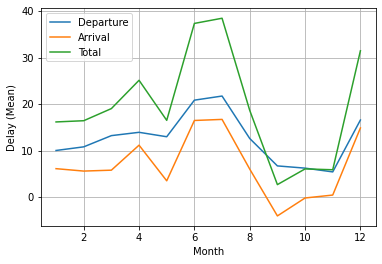

Annual total mean delay:  19.483071457430285
Annual total delay variance:  138.95587823059415 ;   sqrt =  11.787954794220843


Winter  average departure delay:  12.5  minutes
Spring  average departure delay:  13.4  minutes
Summer  average departure delay:  18.4  minutes
Autumn  average departure delay:  6.1  minutes


Winter  average arrival delay:  8.9  minutes
Spring  average arrival delay:  6.8  minutes
Summer  average arrival delay:  13.1  minutes
Autumn  average arrival delay:  -1.2  minutes


Winter  average total delay:  21.3  minutes
Spring  average total delay:  20.2  minutes
Summer  average total delay:  31.5  minutes
Autumn  average total delay:  4.9  minutes




 Report on  EWR


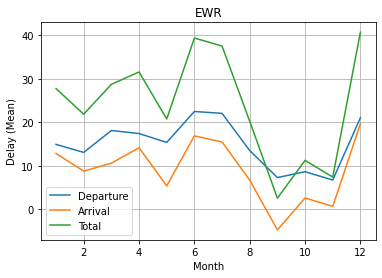

Annual total mean delay:  24.121668281174475
Annual total delay variance:  155.95120312339813 ;   sqrt =  12.488042405573346


Winter  average departure delay:  16.3  minutes
Spring  average departure delay:  17.0  minutes
Summer  average departure delay:  19.3  minutes
Autumn  average departure delay:  7.6  minutes


Winter  average arrival delay:  13.7  minutes
Spring  average arrival delay:  10.0  minutes
Summer  average arrival delay:  13.0  minutes
Autumn  average arrival delay:  -0.5  minutes


Winter  average total delay:  30.1  minutes
Spring  average total delay:  27.0  minutes
Summer  average total delay:  32.3  minutes
Autumn  average total delay:  7.1  minutes




 Report on  JFK


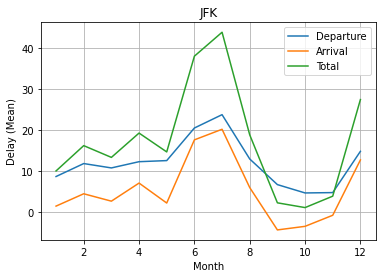

Annual total mean delay:  17.392038270208634
Annual total delay variance:  182.4420868237091 ;   sqrt =  13.507112453211793


Winter  average departure delay:  11.7  minutes
Spring  average departure delay:  11.8  minutes
Summer  average departure delay:  19.1  minutes
Autumn  average departure delay:  5.3  minutes


Winter  average arrival delay:  6.1  minutes
Spring  average arrival delay:  3.9  minutes
Summer  average arrival delay:  14.6  minutes
Autumn  average arrival delay:  -3.0  minutes


Winter  average total delay:  17.9  minutes
Spring  average total delay:  15.7  minutes
Summer  average total delay:  33.6  minutes
Autumn  average total delay:  2.3  minutes




 Report on  LGA


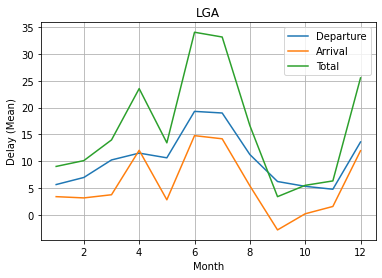

Annual total mean delay:  16.226128451508565
Annual total delay variance:  111.51875167076531 ;   sqrt =  10.560243920988063


Winter  average departure delay:  8.7  minutes
Spring  average departure delay:  10.8  minutes
Summer  average departure delay:  16.5  minutes
Autumn  average departure delay:  5.4  minutes


Winter  average arrival delay:  6.2  minutes
Spring  average arrival delay:  6.2  minutes
Summer  average arrival delay:  11.5  minutes
Autumn  average arrival delay:  -0.4  minutes


Winter  average total delay:  14.9  minutes
Spring  average total delay:  17.0  minutes
Summer  average total delay:  28.0  minutes
Autumn  average total delay:  5.1  minutes


Temp in NYC every month:


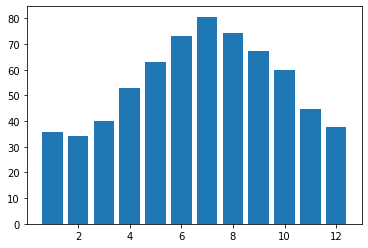

Wind in NYC every month:


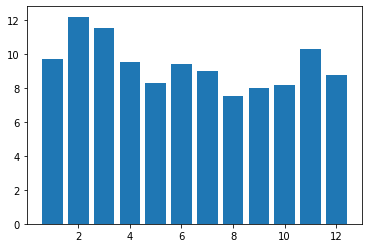

Visibility in NYC every month:


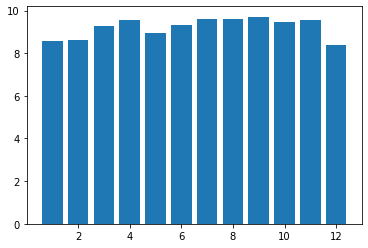

In [219]:
winter = np.array([12, 1, 2])
spring = np.array([3, 4, 5])
summer = np.array([6, 7, 8])
fall   = np.array([9, 10, 11])
seasons = np.array([winter, spring, summer, fall])
Seasons = np.array(["Winter", "Spring", "Summer", "Autumn"])

sum = flights.groupby("month")['arr_delay'].mean() + flights.groupby("month")['dep_delay'].mean()
#General
plt.plot(range(1, len(flights.groupby("month"))+1), flights.groupby("month")['dep_delay'].mean(), label = "Departure")
plt.plot(range(1, len(flights.groupby("month"))+1), flights.groupby("month")['arr_delay'].mean(), label = "Arrival")
plt.plot(range(1, len(flights.groupby("month"))+1), sum, label = "Total")
plt.xlabel("Month")
plt.ylabel("Delay (Mean)")
plt.legend()
plt.grid()
plt.show()

print("Annual total mean delay: ", sample_mean(sum), )
print("Annual total delay variance: ", sample_var(sum), ";   sqrt = ", math.sqrt(sample_var(sum)))
print("\n")

for i in range(0, 4):
    print(Seasons[i], " average departure delay: ", round(flights.groupby("month")['dep_delay'].mean()[seasons[i]].mean(), 1), " minutes")
print("\n")

for i in range(0, 4):
    print(Seasons[i], " average arrival delay: ", round(flights.groupby("month")['arr_delay'].mean()[seasons[i]].mean(), 1), " minutes")
print("\n")

for i in range(0, 4):
    print(Seasons[i], " average total delay: ", round(sum[seasons[i]].mean(), 1), " minutes")
print("\n")

# Airport specific
for i, airport in enumerate(flightsport):
    print("\n\n Report on ", airports[i])
    
    sumport = airport.groupby("month")['dep_delay'].mean()+airport.groupby("month")['arr_delay'].mean()

    plt.plot(range(1, len(airport.groupby("month"))+1), airport.groupby("month")['dep_delay'].mean(), label = "Departure")
    plt.plot(range(1, len(airport.groupby("month"))+1), airport.groupby("month")['arr_delay'].mean(), label = "Arrival")
    plt.plot(range(1, len(airport.groupby("month"))+1), sumport, label = "Total")

    plt.xlabel("Month")
    plt.ylabel("Delay (Mean)")
    plt.title(airports[i])
    plt.legend()
    plt.grid()
    plt.show()

    print("Annual total mean delay: ", sample_mean(sumport), )
    print("Annual total delay variance: ", sample_var(sumport), ";   sqrt = ", math.sqrt(sample_var(sumport)))
    print("\n")

    for j in range(0, 4):
        print(Seasons[j], " average departure delay: ", round(airport.groupby("month")['dep_delay'].mean()[seasons[j]].mean(), 1), " minutes")
    print("\n")

    for j in range(0, 4):
        print(Seasons[j], " average arrival delay: ", round(airport.groupby("month")['arr_delay'].mean()[seasons[j]].mean(), 1), " minutes")
    print("\n")

    for j in range(0, 4):
        print(Seasons[j], " average total delay: ", round(sumport[seasons[j]].mean(), 1), " minutes")
    print("\n")


width=0.4
print("Temp in NYC every month:")
plt.bar(np.arange(1, 13), weather.groupby(['month'])['temp'].mean(), label = 'Temp')
plt.show()
print("Wind in NYC every month:")
plt.bar(np.arange(1, 13), weather.groupby(['month'])['wind_speed'].mean(), label='Wind')
plt.show()
print("Visibility in NYC every month:")
plt.bar(np.arange(1, 13), weather.groupby(['month'])['visib'].mean())
plt.show()

Seasons:
1. Summer and Christmas are popular travel seasons
2. Easter (April) is popular-ish
3. Autumn is not popular time to travel at all

Weather:
1. Temp correlates with both departure and arrival delays in all airports
2. Wind correlates with both delay types (see Spring positive changes in both wind speed and delays)
3. Visibility does not seem to correlate with delays

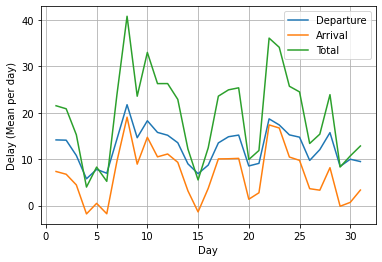

Mean total delay:  19.462740672529474
Total delay variance:  92.44659906619158 ;   sqrt =  9.614915447688118


In [214]:
sum = flights.groupby("day")['arr_delay'].mean() + flights.groupby("day")['dep_delay'].mean()
plt.plot(range(1, len(flights.groupby("day"))+1), flights.groupby("day")['dep_delay'].mean(), label = "Departure")
plt.plot(range(1, len(flights.groupby("day"))+1), flights.groupby("day")['arr_delay'].mean(), label = "Arrival")
plt.plot(range(1, len(flights.groupby("day"))+1), sum, label = "Total")

plt.xlabel("Day")
plt.ylabel("Delay (Mean per day)")
plt.legend()
plt.grid()
plt.show()

print("Mean total delay: ", sample_mean(sum))
print("Total delay variance: ", sample_var(sum), ";   sqrt = ", math.sqrt(sample_var(sum)))


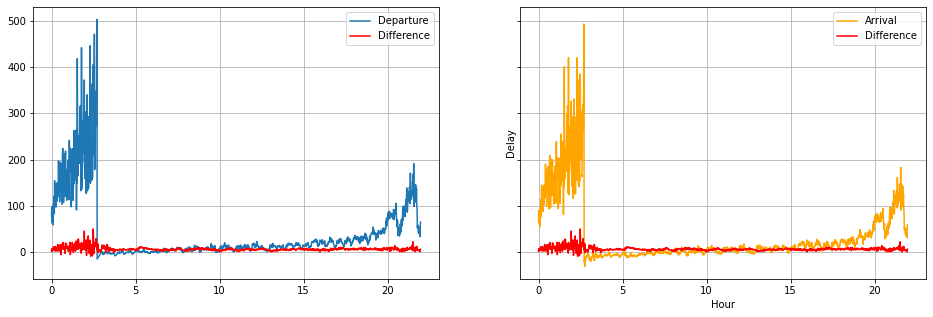

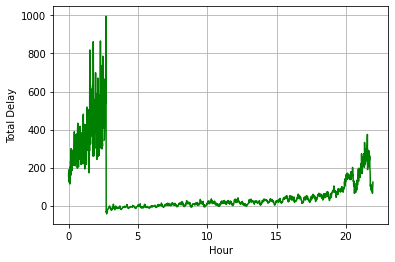

Mean difference:  6.506273670105382
Mean difference variance:  15.69204225252022 ;   sqrt =  3.9613182468113086
Mean total delay:  76.63662569020354
Total delay variance:  19263.035102728925 ;   sqrt =  138.79133655502034


In [215]:
timearray = np.array(range(len(flights.groupby("dep_time")))) / 60
sum = flights.groupby("dep_time")['dep_delay'].mean() + flights.groupby("dep_time")['arr_delay'].mean()

fig, axs = plt.subplots(1, 2, sharey=True, figsize = (16, 5))
fig.suptitle('')
axs[0].plot(timearray, flights.groupby("dep_time")['dep_delay'].mean(), label = "Departure")
axs[1].plot(timearray, flights.groupby("dep_time")['arr_delay'].mean(), label = "Arrival", c='orange')
axs[0].plot(timearray, flights.groupby("dep_time")['dep_delay'].mean() - flights.groupby("dep_time")['arr_delay'].mean(), label = "Difference", c='red')
axs[1].plot(timearray, flights.groupby("dep_time")['dep_delay'].mean() - flights.groupby("dep_time")['arr_delay'].mean(), label = "Difference", c='red')

plt.xlabel("Hour")
plt.ylabel("Delay")
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()

plt.show()

plt.plot(timearray, sum, c='green')
plt.xlabel("Hour")
plt.ylabel("Total Delay")
plt.grid()
plt.show()

diffavg = flights.groupby("dep_time")['dep_delay'].mean() - flights.groupby("dep_time")['arr_delay'].mean()
print("Mean difference: ", sample_mean(diffavg))
print("Mean difference variance: ", sample_var(diffavg), ";   sqrt = ", math.sqrt(sample_var(diffavg)))
print("Mean total delay: ", sample_mean(sum))
print("Total delay variance: ", sample_var(sum), ";   sqrt = ", math.sqrt(sample_var(sum)))


As we can clearly see, mornging and daytime (3 am - 3 pm) flights have almost no delay; evening (3 pm - 8 pm) flights have a slight delay and night time (8 pm - 3 am) flights have enormous delays.

## ii. Dependency on distance of flight

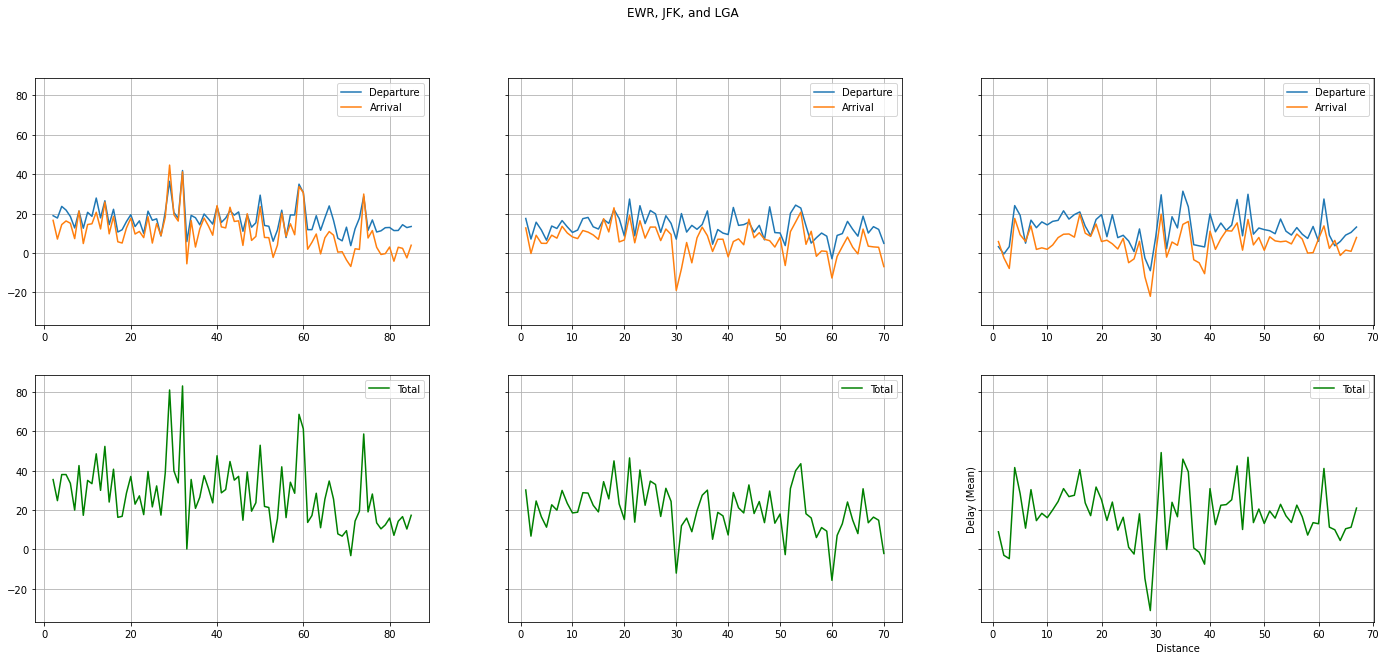

In [216]:

fig, ax = plt.subplots(2, 3, sharey=True, figsize = (24, 10))

for i, airport in enumerate(flightsport):
    sumport = airport.groupby("distance")['dep_delay'].mean()+airport.groupby("distance")['arr_delay'].mean()

    ax[0, i].plot(range(1, len(airport.groupby("distance"))+1), airport.groupby("distance")['dep_delay'].mean(), label = "Departure")
    ax[0, i].plot(range(1, len(airport.groupby("distance"))+1), airport.groupby("distance")['arr_delay'].mean(), label = "Arrival")
    ax[1, i].plot(range(1, len(airport.groupby("distance"))+1), sumport, label = "Total", c='green')

    ax[0, i].legend()
    ax[0, i].grid()
    ax[1, i].legend()
    ax[1, i].grid()

plt.xlabel("Distance")
plt.ylabel("Delay (Mean)")
fig.suptitle("EWR, JFK, and LGA")
plt.show()


Conlusion: 
1. Departure delay does not correlate with distance.
2. Arrival delay does not correlate with distance.


## iii. Carrier dependency

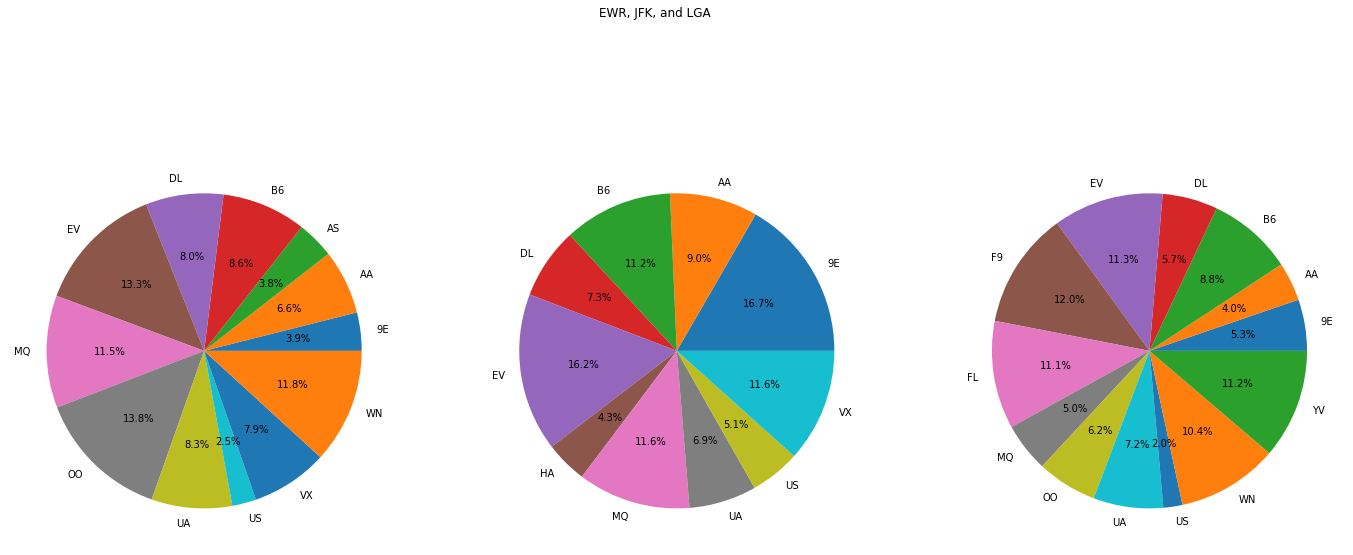

In [217]:
fig, ax = plt.subplots(1, 3, figsize = (24, 10))
fig.suptitle("EWR, JFK, and LGA")
for i, airport in enumerate(flightsport):
    a = airport.groupby('carrier')
    group_names = []
    for name,group in a: group_names.append(name)
    group_names = np.array(group_names, dtype=object)
    ax[i].pie(a['dep_delay'].mean(), labels = group_names, autopct='%1.1f%%')
    airport['carrier'].unique()

plt.show()
